## 本章介绍

本章构造的决策树算法能够读取数据集合，构建类似于图3-1的决策树。决策树的一个重要的任务是为了理解数据中所蕴含的知识信息，因此决策树可以使用不熟悉的数据集合，并从中提取出一系列规则，这些机器根据数据集创建规则的过程，就是机器学习的过程。

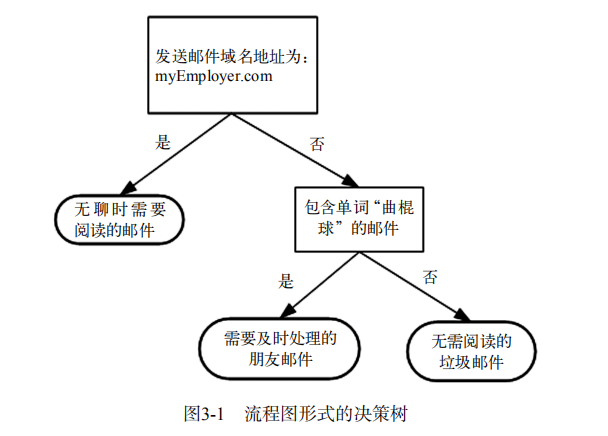

接下来我们将学习如何从一堆原始数据中构造决策树。首先我们讨论构造决策树的方法，以及如何编写构造树的Python代码；接着提出一些度量算法成功率的方法，最后我们使用递归建立分类器，并且使用Matplotlib绘制决策树图。构造决策树分类器之后，我们将输入一些隐形眼镜的处方数据，并由决策树分类器预测需要的镜片类型。

表3-1的数据包含5个海洋动物，特征包括：不浮出水面是否可以生存，以及是否有脚蹼。我们可以将这些动物分为两类：鱼类和非鱼类。现在我们想要决定依据第一个特征还是第二个特征划分数据。在回答这个问题之前，我们必须采用量化的方法判断如何划分数据。

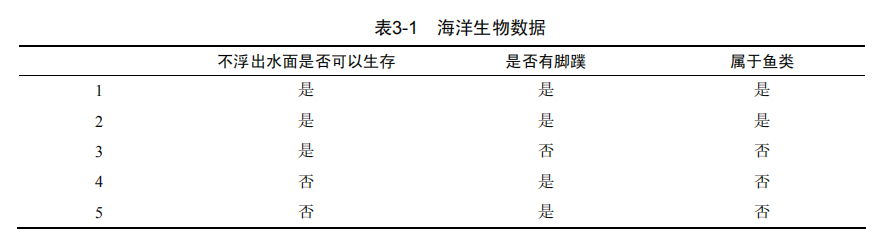

### 信息增益

划分数据集的大原则是：将无序的数据变得更加有序。我们可以使用多种方法划分数据集，但是每种方法都有各自的优缺点。组织杂乱无章数据的一种方法就是使用信息论度量信息，信息论是量化处理信息的分支科学。我们可以在划分数据之前或之后使用信息论量化度量信息的内容。

在划分数据集之前之后信息发生的变化称为信息增益，知道计算信息增益，我们就可以计算每个特征值划分数据集获得的信息增益，获得信息增益最高的特征就是最好的选择

$$H=-\sum_{i=1}^{n}p(x_i)log_2p(x_i)$$

### 计算给定数据集的香农熵

In [1]:
from math import log
def calchShannonEnt(dataSet):
    '''
    函数功能：计算香农熵
    参数说明：
            dataSet__原始数据集
    函数返回：
            香农熵的值
    '''
    numEntries = len(dataSet)                       # 获取数据的行数
    labelCounts = {}                                # 创建字典，存储数据为，类别：频数
    for featVec in dataSet:                         # 遍历每一行数据
        currentLabel = featVec[-1]                  # 获取每一行数据的最后一个数据
        if currentLabel not in labelCounts.keys():  # 如果currentLabels不在字典中
            labelCounts[currentLabel] = 0              # 将当前的标签存入字典只能怪
        labelCounts[currentLabel] += 1                 # #否则将当前标签对应的键值加1
    
    shannonEnt = 0.0                                # 初始化香农熵
    for key in labelCounts:                         # 遍历数据中每一个类别
        pro = float(labelCounts[key]) / numEntries  # 计算概率
        shannonEnt -= pro * log(pro, 2)             # 计算香农熵
    return shannonEnt                               # 返回香农熵的值

### 创建数据集

In [2]:
import pandas as pd 
def creatDateSet():
    '''
    函数功能：
            创建数据集
    函数返回：
            数据集
    '''
    dataSet = [[1, 1, 'yes'],                                # 创建数据集              
                [1, 1, 'yes'],
                [1, 0, 'no'],
                [0, 1, 'no'],
                [0, 1, 'no']]
    labels = ['no surfacing', 'flippers', 'labels']          # 两个特征：'no surfacing','flippers'；一个标签'labels'  
    return dataSet                                           # 返回数据集

# 函数测试 
dataSet = creatDateSet()
calchShannonEnt(dataSet)

0.9709505944546686

In [ ]:
dataSet[0][-1] = 'maybe'
print(dataSet)
print(calchShannonEnt(dataSet))

需要说明的是，熵越高，那么混合的数据就越多，如果我们在数据集中添加更多的分类，会导致熵结果增大。得到熵之后，我们就可以安装获取最大信息增益的方法划分数据集

### 划分数据集

In [3]:
def splitDateSet(dataSet, axis, value):
    '''
    函数功能：
            按照给定特征划分数据集
    参数说明：
            dataSet__原始数据集
            axis__列索引
            value__特征值
    函数返回：
            划分之后的数据集
    '''
    retDataSet = []                                           # 不修改原数据集，创建新的列表对象
    for featVec in dataSet:                                   # 遍历每一行数据
        if featVec[axis] == value:                            # 遍历的值如果等于value
            reducedFeatVec = featVec[:axis]                   #将特征向量的0~axis-1列存入列表reducedFeatVec
            # extend()__将另外一个列表中的元素（以列表中元素为对象），一一添加到当前列表中，构成一个列表
            reducedFeatVec.extend(featVec[axis+1:])           #将特征向量的axis+1~最后一列存入列表reducedFeatVec
            # append()__将另外一个列表（以列表为对象）添加到当前列表中
            retDataSet.append(reducedFeatVec)
    return retDataSet
splitDateSet(dataSet, 0,0)

[[1, 'no'], [1, 'no']]

- Python语言在函数中传递的是列表的引用，在函数内部对列表对象的修改，将会会影响该列表对象的整个生存周期。为了消除这个不良影响，我们需要在函数的开始声明一个新列表对象。

- extend()__将另外一个列表中的元素（以列表中元素为对象），一一添加到当前列表中，构成一个列表
- append()__将另外一个列表（以列表为对象）添加到当前列表中

#### 信息增益

$$Gain(D,a)=Ent(D) - \sum_{v=1}^v \frac{D^v}{D}Ent(D^v)$$

In [4]:
def chooseBestFeatureToSplit(dataSet):
    '''
    函数功能：选择最好的数据集划分方式
    参数说明：
            dataSet__原本数据集
    函数返回值：
            返回最好的划分数据集的特征
    '''
    numFeatures = len(dataSet[0])-1                             # 特征数量(不包含最后一列的特征标签)
    baseEntropy = calchShannonEnt(dataSet)                      # 原始香农熵__未划分的香农熵
    bestInfoGain = 0.0                                          # 初始化信息增益
    bestFeature = -1                                            # 初始化最佳切分列
    for i in range(numFeatures):                                # 遍历数据集中所有的特征
        featList = [example[i] for example in dataSet]          # 使用列表推导式，将特征值放入list中
        uniqueVals = set(featList)                              # 使用set函数去除uniqueVals中重复的元素
        newEntrpy = 0.0                                         # 初始化子节点的香农熵
        for value in uniqueVals:                                # 遍历特征的每一个取值，构建不同的子集
            subDataSet = splitDateSet(dataSet, i, value)        # 使用函数splitDateSet（）获取不同取值的数据集

            pro = len(subDataSet) / float(len(dataSet))         # 公式
            newEntrpy += pro * calchShannonEnt(subDataSet)      # 公式
        
        infoGain = baseEntropy - newEntrpy                      # 公式
        if (infoGain) > bestInfoGain:                           # 比较当前计算的信息增益与保存最大的信息增益
            bestInfoGain = infoGain                             # 保存为最大信息增益
            bestFeature = i                                     # 获取当前最大信息增益的特征i
    return bestFeature                                          # 返回最优特征

# 函数测试
chooseBestFeatureToSplit(dataSet)

0

运行代码告诉我们，第0个特征是最好的用于划分数据集的特征。

本节我们学习了如何度量数据集的信息熵，如何有效地划分数据集下一节，我们将介绍如何将将这些函数功能放在一起，构建决策树。

### 递归构建决策树


目前我们已经学习了从数据集构造决策树算法所需要的子功能模块，其工作原理如下：得到原始数据集，然后基于最好的属性值划分数据集，由于特征值可能多于两个，因此可能存在大于两个分支的数据集划分。在第一次划分之后，数据将被向下传递到树分支的下一个节点，在这个节点上，我们可以再次划分数据，因此我们可以采用递归的原则处理数据集。

递归的结束条件是：程序遍历按所有划分数据集的属性，或者每个分支下的所有实例都具有相同的分类。如果所有的实例具有相同的分类，则得到一个叶子节点或者终止块。任何达到叶子节点的数据必然属于叶子节点的分类。参见图3-2所示。

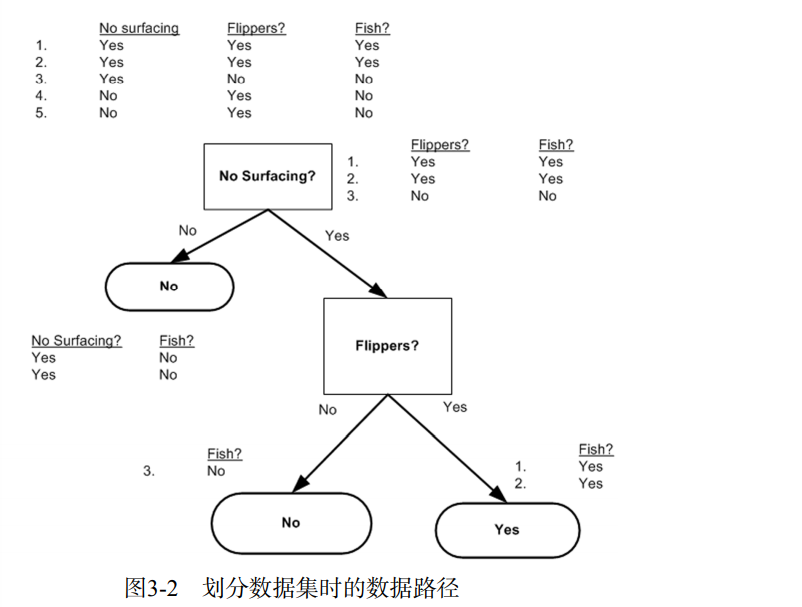

第一个结束条件使得算法可以终止，我们甚至可以设置算法可以划分的最大分组数目。后续章节还会介绍其他决策树算法，如C4.5和CART，这些算法在运行时并不总是在每次划分分组时都会消耗。由于ྱ特征数目并不是在每次划分数据分组时都减少，因此这些算法在实际使用时可能引起一定的问题。目前我们并不需要考虑这个问题，只需要在算法开始运行前计算列的数目，查看算法是否使用了所有属性即可。如果数集已经处理了所有属性，但是类标签依然不是唯一的，此时我们需要决定如定义该叶子节点，在这种情况下，我们通常会采用多数表决的方法决定该叶子节点的分类。

In [5]:
import operator
def majorityCnt(classList):
    '''
    函数功能：
            投票表决，选取最多作为返回值
    函数参数：
            classList__分类名称的列表
    '''
    classCount = {}                       # 创建一个类标签字典
    for vote in classList:                # 遍历类标签中的每一个元素
        if vote not in classCount.keys():  # 如果元素不在字典中
            classCount[vote] = 0          # 在字典中添加新的键值对，values设置为0
        classCount[vote] += 1             # 否则，当前键对应的值加1
    sortedClassCount = sorted(classCount.items(),              # 列表对象(迭代器)
                                 key = operator.itemgetter(1),     # 获取列表对象的第一个域的值
                                 reverse = True)                   # 降序排序，默认是升序排序

    return sortedClassCount[0][0]     # 返回出现次数最多的类标签

接下里我们可以通过递归的方式写出决策树的构建代码了

In [6]:
def createTree(dataSet, labels):
    '''
    函数功能：
            基于最大信息增益切分数据集，递归构建决策树
    函数参数：
            dataSet__数据集
            labels__标签列表
    函数返回：
            字典形式的决策树
    '''
    classList = [example[-1] for example in dataSet]    # 获取数据集中的最后一列，存入classList中
    # vcount() 方法用于统计字符串里某个字符出现的次数__得到类标签列表中第一个类标签的数目
    if classList.count(classList[0]) == len(classList):  # 第一个类标签的数目是否等于列表长度(类别相同)
        return classList[0]
    if len(dataSet[0]) == 1:      # 遍历完所有特征时返回类标签列表中出现次数最多的类别
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)  # 返回当前最优的分类特征
    bestfeatureLabel = labels[bestFeat]           # 在特征标签labels中获取对应的特征标签值
    myTree = {bestfeatureLabel:{}} # 采用字典嵌套的方式来存储树信息
    #sublabels = labels[:]  # 复制当前特征标签列
    del(labels[bestFeat]) # 删除当前特征
    featValues = [example[bestFeat] for example in dataSet] # 获取最佳特征特征所在列
    uniqueVals = set(featValues) # 去重，获取所有特征的唯一取值
    for value in uniqueVals:   # 遍历每一个特征值
        sublabels = labels[:]  # 复制当前特征标签列，防止改变原始列表的内容
        # bestfeatureLabels__分类特征的标签值
        # value__特征取值
        # splitDataSet__使用划分之后的数据集
        # dataSet__要分类的数据集
        myTree[bestfeatureLabel][value] = createTree(splitDateSet(dataSet, bestFeat, value), sublabels)
    
    return myTree 

# 函数测试
labels = ['no surfacing', 'flippers', 'labels']
createTree(dataSet, labels)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

变量myTree包含了很多代表树结构信息的嵌套字典，从左边开始，第一个关键字no surfacing是第一个划分数据集的特征名称，该关键字的值也是另一个数据字典。第二个关键字是no surfacingྱ特征划分的数据集，这些关键字的值是no surfacing节点的子节点。这些值可能是类标签，叶可能是另一个数据字典。如果值是类标签，则该子节点是叶子节点；如果值是另一个数据字典，则子节点是一个判断节点，这种格式结构不断重复就构成了整棵树。

### 测试算法：使用决策树执行分类

依靠训练数据构造了决策树之后，我们可以将它用于实际数据的分类。在执行数据分类时，需要使用决策树以及用于构造决策树的标签向量。然后，程序比较测试数据与决策树上的数值，递归执行该过程指导进入叶子节点；最后将测试数据定义为叶子节点所属的类型。

In [ ]:
labels = ['no surfacing', 'flippers', 'labels']
tree = createTree(dataSet, labels)
print(tree)

In [7]:
def classify(inputTree, featLabels, testVec):
    '''
    函数功能：
            对测试实例进行分类
    参数说明：
            inputTree__已经训练好的决策树
            featLabels__特征标签类别
            testVec__测试示例
    函数返回：
            分类结果  
    '''
    # python3.x中input.key()[0]返回的是dict_keys，不是list，这里注意区别（书上的代码是python2.x）
    firstStr = list(inputTree.keys())[0]  # 获得决策树第一个节点
    secondDict = inputTree[firstStr]      # 获取下一个字典
    featIndex = featLabels.index(firstStr)    # 将标签字符串转换为索引(第一个节点所在列的索引)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

### 决策树的存储

构造决策树是很耗时的任务，即使处理很小的数据集，如前面的样本数据，也是要花费几秒的时间，如果数据集很大，将会耗费很多计算时间。然而用创建好的决策树解决分类问题，则可以很快完成。因此，为了节省计算时间，最好能够在每次执行分类时调用已经构造好的决策树。为了解决这个问题，需要使用Python模块pickle序列化对象。序列化对象可以在磁盘上保存对象，并在需要时读取出来。任何对象都可以执行序列化操作，字典对象也不例外。

In [8]:
def storeTree(inputTree, filename):
    '''
    函数功能：
            将决策树保存在磁盘中
    函数参数：
            inputTree__决策树
            filename__文件名
    '''
    import pickle                    # 导入pickle模块
    # 按照书中这里写的'w'，将会报错write() argument must be str,not bytes
    # 所以这里将改写为'wb'
    fw = open(filename, 'wb')        # 创建一个可以“写入”的文件
    pickle.dump(inputTree, fw)       # pickle的dump函数将决策树写入文件中  
    fw.close()                       # 写完成后关闭文件
def gradTree(filename):
    '''
    函数功能：
            将树从磁盘中取出
    函数参数：
            filename__文件名
    '''
    import pickle                     # 导入pickle模块
    fr = open(filename, 'rb')         # 使用'rb'读出数据
    return pickle.load(fr)    

# 函数测试
labels = ['no surfacing', 'flippers', 'labels']
tree = createTree(dataSet, labels)
storeTree(tree, 'classifer.txt')
gradTree('classifer.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 在python中使用Matplotlib注解绘制树形图

绘制一棵完整的树需要一些技巧。我们虽然有x、y坐标，但是我们如何如何放置所有的节点却是个问题。我们必须知道有多个个叶节点，以便可以正确确定x轴的长度；我们还需要知道树有多少层，以便可以正确确定y轴的高度。这里我们定义两个新函数getNumLeafs()和getTreeDepth()，来获取叶节点的数目和树的层数。

### 获取叶节点的数目

In [9]:
def getNumLeafs(myTree):
    '''
    函数功能：
            递归计算叶子节点数目
    函数参数：
            字典形式的决策树
    函数返回：
            叶子节点数目
    '''
    numLeafs = 0                                           # 初始化叶子节点的数目
    firstStr = list(myTree.keys())[0]                      # 获取决策树的第一个节点
    secondDict = myTree[firstStr]                          # 获取决策树的第二个节点  
    for key in secondDict.keys():                          
        if type(secondDict[key]).__name__ == 'dict':       # 若该节点为字典形式 
            numLeafs += getNumLeafs(secondDict[key])       # 若为字典，则递归计算新分支叶节点数 
        else:
            numLeafs += 1                                  # 若不是字典，则此节点为叶子节点 
    return numLeafs                                        # 返回叶子节点数目

# 函数测试
labels = ['no surfacing', 'flippers', 'labels']
tree = createTree(dataSet, labels)
getNumLeafs(tree)

3

### 获取树的层数

In [10]:
def getTreeDepth(myTree):
    '''
    函数功能：
            递归计算决策树的深度
    函数参数：
            myTree__字典形式的决策树
    函数返回：
            决策树的最大深度
    '''
    maxDepth = 0                                            
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

# 函数测试
labels = ['no surfacing', 'flippers', 'labels']
tree = createTree(dataSet, labels)
getTreeDepth(tree)

2

### 使用文本注解绘制树节点

In [11]:
import matplotlib.pyplot as plt                           # 导入matplotlib包
decisionNode = dict(boxstyle = 'sawtooth', fc = '0.8')    # 设置中间节点的格式 
leafNode = dict(boxstyle = 'round4', fc = '0.8')          # 设置叶子节点的格式
arrow_args = dict(arrowstyle = '<-')                      # 定义箭头格式
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    '''
    函数功能：
            绘制节点
    参数说明：
            nodeTxt__节点名
            centerPt__文本位置
            parentPt__标注的箭头位置
            nodeType__节点格式
    '''
    createPlot.ax1.annotate(nodeTxt,                                          # 文本内容  
                           xy = parentPt, xycoords = 'axes fraction',         # 注释的起始位置，坐标系
                           xytext = centerPt, textcoords = 'axes fraction',   # 文本的起始位置
                           va = 'center', ha = 'center',                      # 水平对齐，垂直对齐
                           bbox = nodeType,                                   # 节点格式
                           arrowprops = arrow_args)                           # 箭头格式 

### 标注有向边

In [15]:
def plotMidText(cntrPt, parentPt, txtString):
    '''
    函数功能：
            标注有向边内容
    参数说明：
            cntrpt、parentPt__计算标注位置
            txtString__标注内容
    '''
    xMid = (parentPt[0] - cntrPt[0])/ 2.0 + cntrPt[0]        # 计算文本位置的横坐标
    yMid = (parentPt[1] - cntrPt[1])/2.0 + cntrPt[1]         # 计算文本位置的纵坐标
    createPlot.ax1.text(xMid,                                # 文本位置的横坐标 
                        yMid,                                # 文本位置的纵坐标
                        txtString)                           # 标注内容

### 绘制树

In [16]:
def plotTree(myTree, parentPt, nodeTxt):
    '''
    函数功能：
            绘制决策树
    函数参数：
            myTree__决策树
            parentPt__标注的内容
            nodeTxt__节点名称
    '''
    numLeafs = getNumLeafs(myTree)                          # 获取决策树叶结点数目，决定了树的宽度 
    depth = getTreeDepth(myTree)                            # 获取决策树层数，决定了树的高度
    firstStr = next(iter(myTree))                           # 获得决策树第一个节点
    cntrPt = (plotTree.xOff+(1.0+float(numLeafs))/2.0/plotTree.totalW,plotTree.yOff)#确定中心位置
    plotMidText(cntrPt, parentPt, nodeTxt)                  # 标注有向边内容
    plotNode(firstStr, cntrPt, parentPt, decisionNode)      # 绘制节点
    secondDict = myTree[firstStr]                           # 获取下一个字典
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD     # y偏移值
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':        # 该结点是否为字典
            plotTree(secondDict[key], cntrPt, str(key))     # 如果是字典则不是叶结点，递归调用继续绘制
        else:                                
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW                          # x偏移值
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)  # 绘制节点
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))                # 标注有向边内容
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD                                  # y偏移值

### 主函数

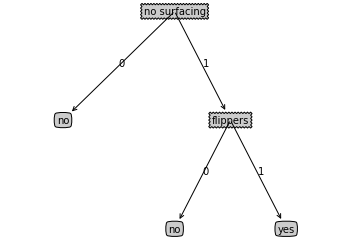

In [19]:
def createPlot(inTree):
    '''
    函数功能：绘制完整的决策树
    参数说明：
            inTree__决策树
    '''
    fig = plt.figure(1, facecolor='white')                      #创建画布
    fig.clf()                                                   #清空画布
    axprops = dict(xticks=[], yticks=[])   
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops) # 除去x、y轴
    plotTree.totalW = float(getNumLeafs(inTree))                # 获取决策树叶结点数目
    plotTree.totalD = float(getTreeDepth(inTree))               # 获取决策树深度
    plotTree.xOff = -0.5/plotTree.totalW                        # x偏移的初始值
    plotTree.yOff = 1.0                                         # y偏移的初始值
    plotTree(inTree, (0.5,1.0), '')                             # 绘制决策树
    plt.show()                                                  #显示图像

# 测试函数
labels = ['no surfacing', 'flippers', 'labels']
tree = createTree(dataSet, labels)
createPlot(tree)

## 使用决策树预测隐形眼镜类型

### 决策树的存储

In [20]:
def storeTree(inputTree, filename):
    '''
    函数功能：
            将决策树保存在磁盘中
    函数参数：
            inputTree__决策树
            filename__文件名
    '''
    import pickle                    # 导入pickle模块
    # 按照书中这里写的'w'，将会报错write() argument must be str,not bytes
    # 所以这里将改写为'wb'
    fw = open(filename, 'wb')        # 创建一个可以“写入”的文件
    pickle.dump(inputTree, fw)       # pickle的dump函数将决策树写入文件中  
    fw.close()                       # 写完成后关闭文件
def gradTree(filename):
    '''
    函数功能：
            将树从磁盘中取出
    函数参数：
            filename__文件名
    '''
    import pickle                     # 导入pickle模块
    fr = open(filename, 'rb')         # 使用'rb'读出数据
    return pickle.load(fr)    

# 函数测试
labels = ['no surfacing', 'flippers', 'labels']
tree = createTree(dataSet, labels)
storeTree(tree, 'classifer.txt')
gradTree('classifer.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

本节我们将通过一个例子讲解决策树如何预测患者需要佩戴的隐形眼镜类型。使用小数据集，我们就可以利用决策树学到很多知识：眼科医生是如何判断患者需要佩戴的镜片类型的；一旦理解了决策树的工作原理，我们甚至也可以帮助人们判断需要佩戴的镜片类型。

隐形眼镜数据集是非常著名的数据集，它包含很多患者眼部状况的观察条件以及医生推荐的隐形眼镜类型。隐形眼镜类型包括硬材质、软材质以及不适合佩戴隐形眼镜。数据来源于UCI数据库，为了更容易显示数据，本书对数据做了简单的更改。

In [21]:
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLable = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses, lensesLable)
lensesTree

{'tearRate': {'reduced': 'no lenses',
  'normal': {'astigmatic': {'no': {'age': {'presbyopic': {'prescript': {'myope': 'no lenses',
        'hyper': 'soft'}},
      'young': 'soft',
      'pre': 'soft'}},
    'yes': {'prescript': {'myope': 'hard',
      'hyper': {'age': {'presbyopic': 'no lenses',
        'young': 'hard',
        'pre': 'no lenses'}}}}}}}}

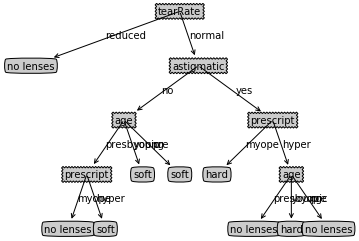

In [22]:
createPlot(lensesTree)

调用createPlot()函数绘制了如图所示的树形图。沿着决策树的不同分支，我们可以得到不同患者需要佩戴的隐形眼镜类型。上图我们可以发现，医生最多需要问四个问题就能确定患者需要佩戴哪种类型的隐形眼镜。